<a href="https://colab.research.google.com/github/MalihaSaghir/AI-ML-Internship-tasks/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import tensorflow as tf
import cv2

In [ ]:
import kagglehub
paultimothymooney_breast_histopathology_images_path = kagglehub.dataset_download('paultimothymooney/breast-histopathology-images')

print('Data source import complete.')

100%|██████████| 3.10G/3.10G [00:27<00:00, 121MB/s]

Extracting files...


Data source import complete.


In [ ]:
breast_img = glob.glob(f'{paultimothymooney_breast_histopathology_images_path}/IDC_regular_ps50_idx5/**/*.png', recursive = True)

# Print the number of images found
print(f"Found {len(breast_img)} images.")

for imgname in breast_img[:3]:
    print(imgname)

Found 277524 images.
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x2351_y901_class0.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x1501_y1501_class0.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x2251_y1251_class0.png


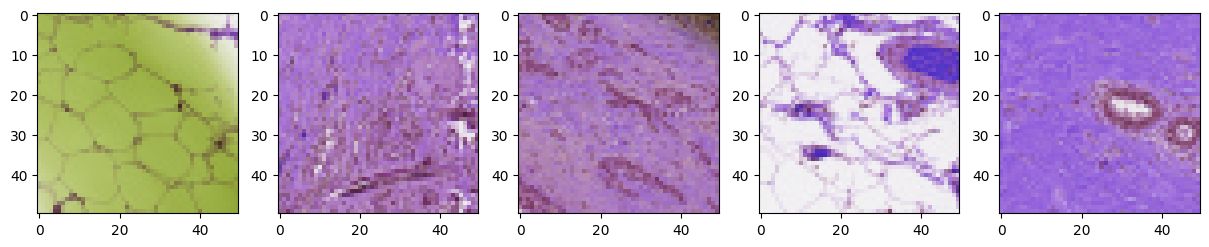

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
# Limit the loop to the number of images found, or 5, whichever is smaller
num_images_to_plot = min(len(breast_img), 5)
for i in range(num_images_to_plot):
    img = cv2.imread(breast_img[i])
    axes[i].imshow(img)

In [ ]:
df = pd.DataFrame(index=np.arange(0, len(breast_img)), columns=["path", "target"])
for i in range(len(breast_img)):
    df.loc[i, "path"] = breast_img[i]
    df.loc[i, "target"] = int(breast_img[i][-5])

In [ ]:
df

,path,target
0,/root/.cache/kagglehub/datasets/paultimothymoo...,0
1,/root/.cache/kagglehub/datasets/paultimothymoo...,0
2,/root/.cache/kagglehub/datasets/paultimothymoo...,0
3,/root/.cache/kagglehub/datasets/paultimothymoo...,0
4,/root/.cache/kagglehub/datasets/paultimothymoo...,0
...,...,...
277519,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277520,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277521,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277522,/root/.cache/kagglehub/datasets/paultimothymoo...,1


In [ ]:
pos = df[df.target==1]
neg = df[df.target==0]

In [ ]:
pos.shape
neg.shape

(198738, 2)

Sample Image Paths:
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x2351_y901_class0.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x1501_y1501_class0.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x2251_y1251_class0.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x3151_y801_class0.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/10278/0/10278_idx5_x3151_y1451_class0.png

DataFrame 'target' column:
target
0    198738
1     78786
Name: count, dtype: int64


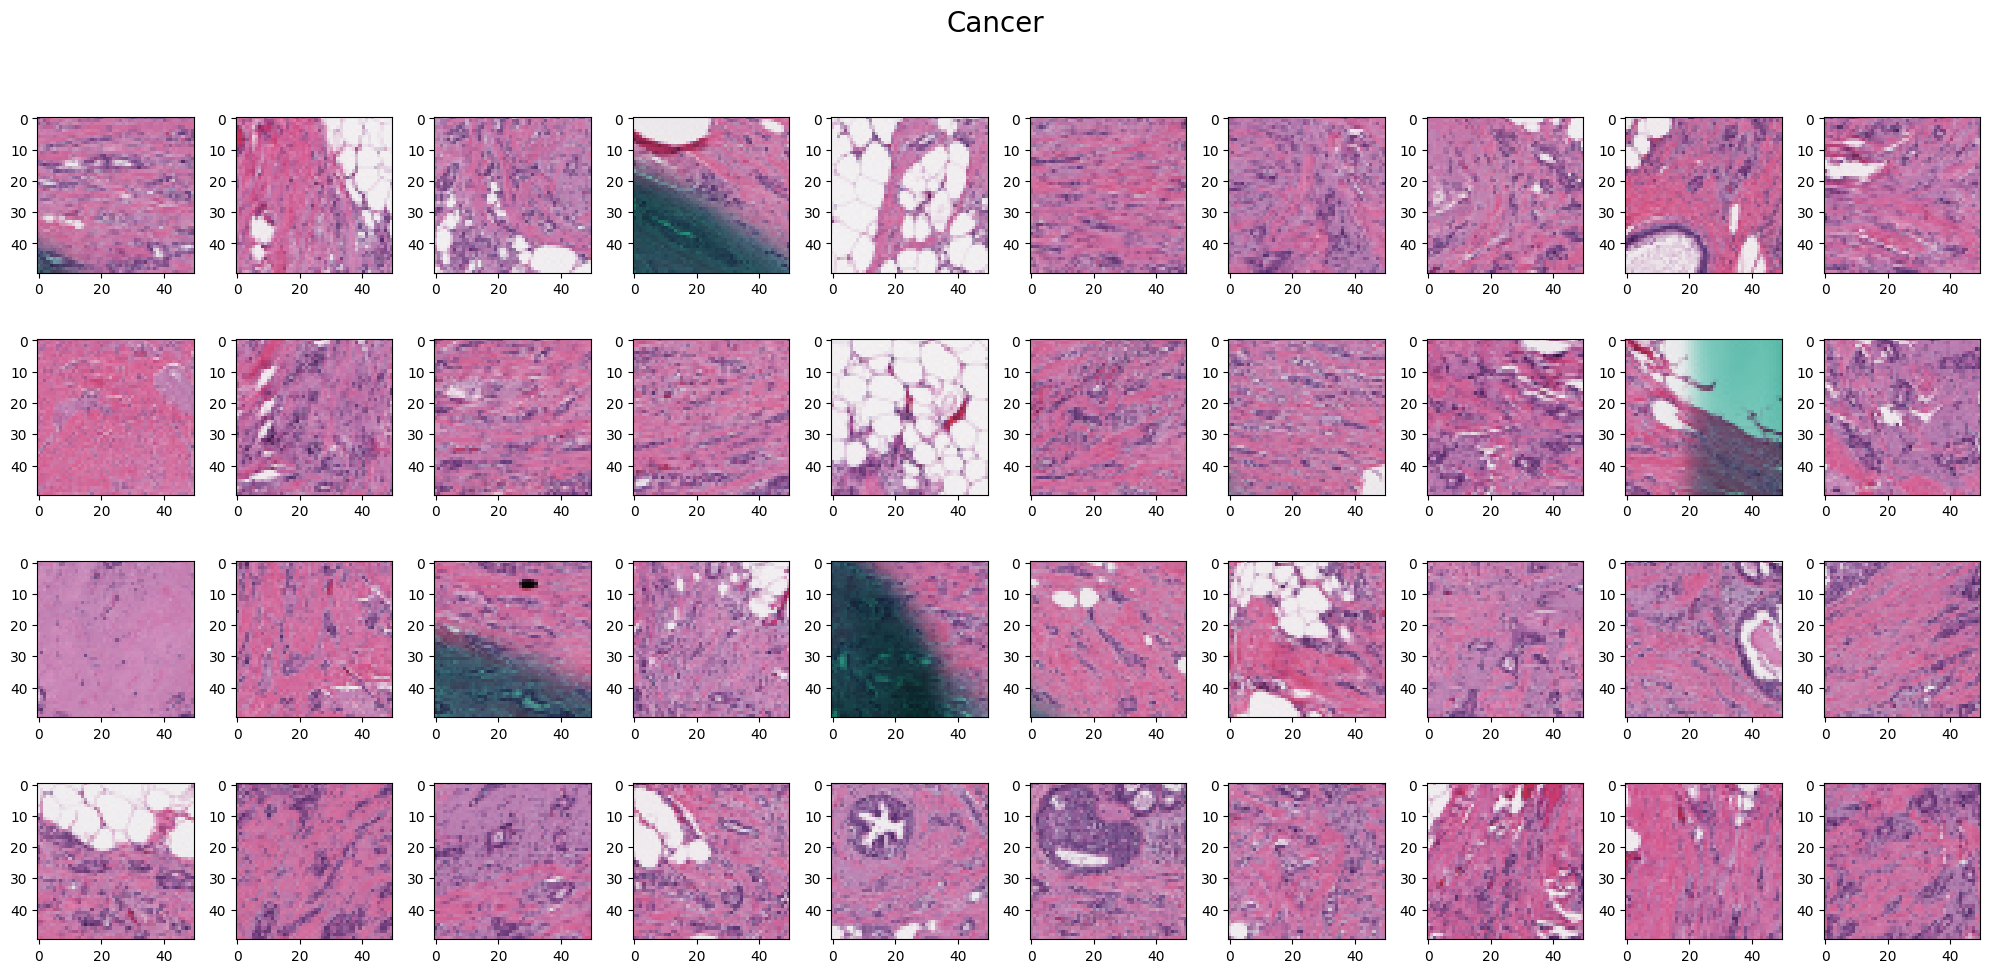

In [ ]:
# Reload image paths
breast_img = glob.glob(f'{paultimothymooney_breast_histopathology_images_path}/IDC_regular_ps50_idx5/**/*.png', recursive = True)

# Print a few paths to check if they end with '1'
print("Sample Image Paths:")
for img_path in breast_img[:5]:
    print(img_path)

# Inspect the 'target' column of the 'df' DataFrame:
print("\nDataFrame 'target' column:")
print(df['target'].value_counts())

# Adjust image selection logic
fig, axes = plt.subplots(4, 10, figsize=(20, 10))
fig.suptitle('Cancer', fontsize=20)

num_images_to_plot = min(len(breast_img), 40)

# Create a DataFrame to store image paths and targets
df = pd.DataFrame({'path': breast_img})
df['target'] = df['path'].str.extract(r'class(\d)\.png').astype(int)

# Filter for cancer images (target == 1)
cancer_images_df = df[df['target'] == 1]

# Display cancer images
for k, img_path in enumerate(cancer_images_df['path'].head(num_images_to_plot)):
    row = k // 10
    col = k % 10
    img = imread(img_path)
    axes[row, col].imshow(img)

plt.tight_layout(rect=[0, 0, 1, 0.96])

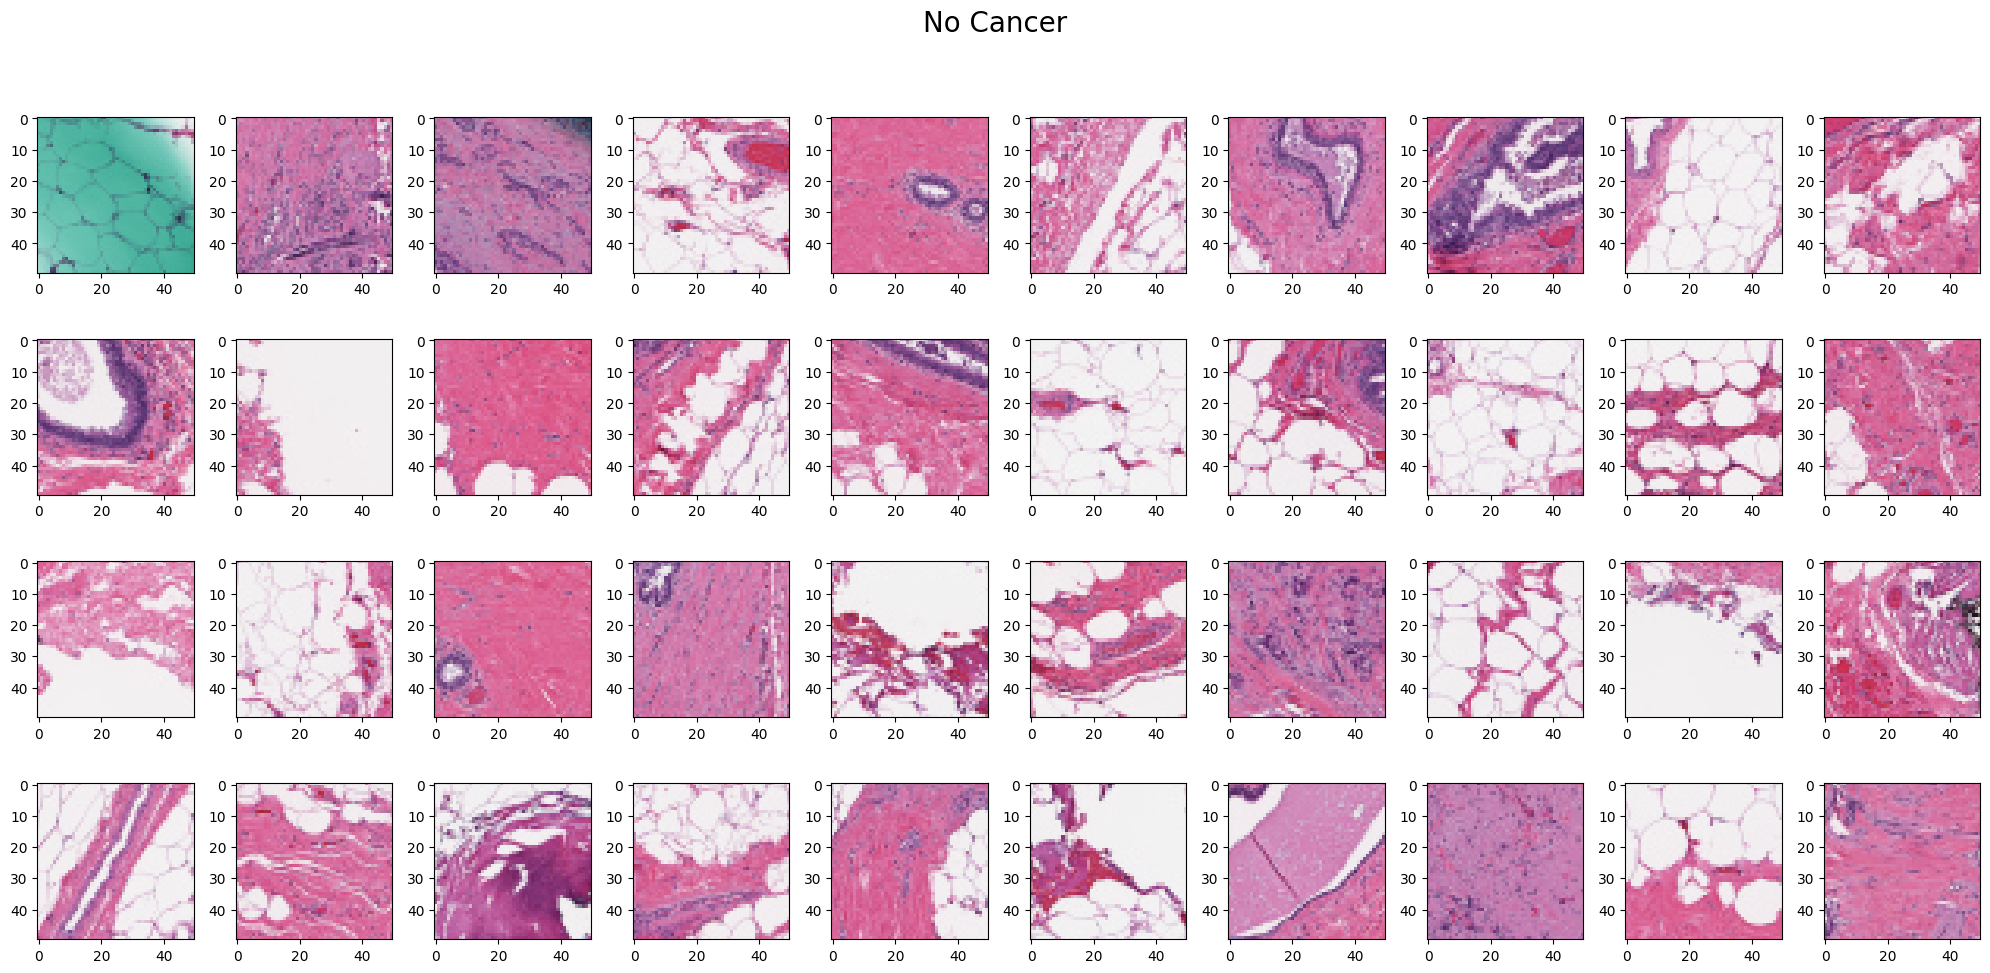

In [ ]:
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('No Cancer', fontsize=20)

# Filter breast_img to get only negative images (target=0)
negative_images = [img_path for img_path in breast_img if img_path[-5] == '0']

# Ensure breast_img is not empty and has at least 40 images
num_images_to_plot = min(len(negative_images), 40)

# Loop through the images and display them
for k in range(num_images_to_plot):
    row = k // 10  # Calculate the row index
    col = k % 10   # Calculate the column index

    # Read and display the negative image
    img = imread(negative_images[k])
    axes[row, col].imshow(img)

plt.tight_layout(rect=[0, 0, 1, 0.96])

In [ ]:
# Data Preprocessing
# Data Augmentation: Enhanced generalization and balance the dataset

# Extract the directory path from the first image path in breast_img
base_dir = '/'.join(breast_img[0].split('/')[:-3])  # Extract the base directory
# Remove the specific image file path and keep only the parent directory structure

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% for validation
)

# Create train and validation generators
train_gen = datagen.flow_from_directory(
    base_dir,  # Use the extracted base directory
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,  # Use the extracted base directory
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 222127 images belonging to 279 classes.
Found 55397 images belonging to 279 classes.


In [ ]:
# CNN Architecture

from tensorflow.keras.layers import Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), # Change input_shape to (64, 64, 3)
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


base_model.trainable = True
for layer in base_model.layers[:-10]:  # Freeze all layers except the last 10
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.00001)  # Use a smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=100,  # Process only 100 batches per epoch
    epochs=20,
    validation_data=val_gen,
    validation_steps=50  # Process 50 batches for validation
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.0050 - loss: -165436336.0000 - val_accuracy: 0.0037 - val_loss: -8516304384.0000
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.0020 - loss: -61850894336.0000 - val_accuracy: 0.0037 - val_loss: -733140680704.0000
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.0015 - loss: -1739552063488.0000 - val_accuracy: 0.0050 - val_loss: -8945921949696.0000
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 8.6018e-04 - loss: -14741672034304.0000 - val_accuracy: 0.0025 - val_loss: -46729281929216.0000
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.0020 - loss: -64982838411264.0000 - val_accuracy: 0.0050 - val_loss: -163798476390400.0000
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.0038 - loss: -207290053427200.0000 - val_accuracy: 0.0050 - val_loss: -429809524015104.0000
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy:

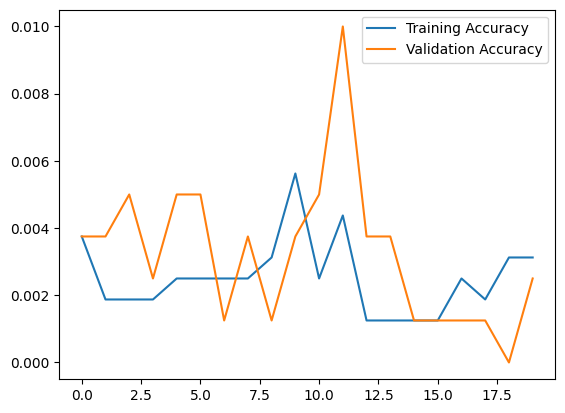

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze layers (if needed)
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    epochs=10,
    steps_per_epoch=100,
    validation_data=val_gen,
    validation_steps=50
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.0014 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.0016 - loss: nan - val_accuracy: 0.0012 - val_loss: nan
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 5.9177e-04 - loss: nan - val_accuracy: 0.0037 - val_loss: nan
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.0012 - loss: nan - val_accuracy: 0.0025 - val_loss: nan
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 4.0946e-04 - loss: nan - val_accuracy: 0.0025 - val_loss: nan
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 6.6780e-04 - loss: nan - val_accuracy: 0.0012 - val_loss: nan
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.0020 - loss: nan - val_accuracy: 0.0050 - val_loss: nan
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.0030 - loss: nan - val_accuracy: 0.0025 - val_loss: nan
